In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import statsmodels.api as sm 
import seaborn as sns

In [3]:
read_path = r'D:\Insurance Kaggle\\'
read_file = 'insurance.csv'
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [6]:
df.dtypes


age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
#turning regions into categorical variable

regions = df['region'].unique().tolist()
regions

for i in range(0, len(regions)): 
    df[regions[i]] =  0
    mask = df['region'] ==regions[i]
    df.loc[mask, regions[i]] = 1

In [8]:
mask = df['sex'] == 'male'
df.loc[mask, 'sex'] = 1
df.loc[~mask, 'sex'] = 0


In [9]:
mask = df['smoker'] == 'yes'
df.loc[mask, 'smoker'] = 1
df.loc[~mask, 'smoker'] = 0 
df

,age,sex,bmi,children,smoker,region,charges,southwest,southeast,northwest,northeast
0,19,0,27.900,0,1,southwest,16884.92400,1,0,0,0
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0,0
3,33,1,22.705,0,0,northwest,21984.47061,0,0,1,0
4,32,1,28.880,0,0,northwest,3866.85520,0,0,1,0
5,31,0,25.740,0,0,southeast,3756.62160,0,1,0,0
6,46,0,33.440,1,0,southeast,8240.58960,0,1,0,0
7,37,0,27.740,3,0,northwest,7281.50560,0,0,1,0
8,37,1,29.830,2,0,northeast,6406.41070,0,0,0,1
9,60,0,25.840,0,0,northwest,28923.13692,0,0,1,0


In [44]:
reg = df[['age','sex','children','smoker','southwest','southeast','northwest','northeast','charges']]
reg

,age,sex,children,smoker,southwest,southeast,northwest,northeast,charges
0,19,0,0,1,1,0,0,0,16884.92400
1,18,1,1,0,0,1,0,0,1725.55230
2,28,1,3,0,0,1,0,0,4449.46200
3,33,1,0,0,0,0,1,0,21984.47061
4,32,1,0,0,0,0,1,0,3866.85520
5,31,0,0,0,0,1,0,0,3756.62160
6,46,0,1,0,0,1,0,0,8240.58960
7,37,0,3,0,0,0,1,0,7281.50560
8,37,1,2,0,0,0,0,1,6406.41070
9,60,0,0,0,0,0,1,0,28923.13692


In [45]:
reg.describe()

,age,sex,children,smoker,southwest,southeast,northwest,northeast,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,1.094918,0.204783,0.242900,0.272048,0.242900,0.242152,13270.422265
std,14.049960,0.500160,1.205493,0.403694,0.428995,0.445181,0.428995,0.428546,12110.011237
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9382.033000
75%,51.000000,1.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,16639.912515
max,64.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,63770.428010


In [46]:
cols = reg.columns.tolist()
for i in range(0, len(cols)):
    print(reg[cols[i]].unique())

[19 18 28 33 32 31 46 37 60 25 62 23 56 27 52 30 34 59 63 55 22 26 35 24
 41 38 36 21 48 40 58 53 43 64 20 61 44 57 29 45 54 49 47 51 42 50 39]
[0 1]
[0 1 3 2 5 4]
[1 0]
[1 0]
[0 1]
[0 1]
[0 1]
[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [47]:
reg['sex'] = pd.to_numeric(reg['sex'])
reg['smoker'] = pd.to_numeric(reg['smoker'])
reg.dtypes

C:\Users\Ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Ivan\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


age            int64
sex            int64
children       int64
smoker         int64
southwest      int64
southeast      int64
northwest      int64
northeast      int64
charges      float64
dtype: object

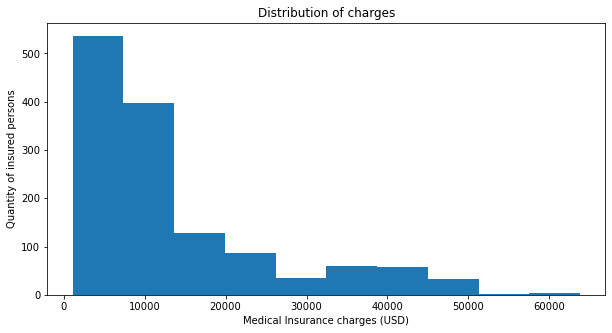

In [48]:
plt.hist(x = reg['charges'], bins = 10)
plt.title('Distribution of charges')
plt.xlabel('Medical Insurance charges (USD)')
plt.ylabel('Quantity of insured persons')
plt.show()

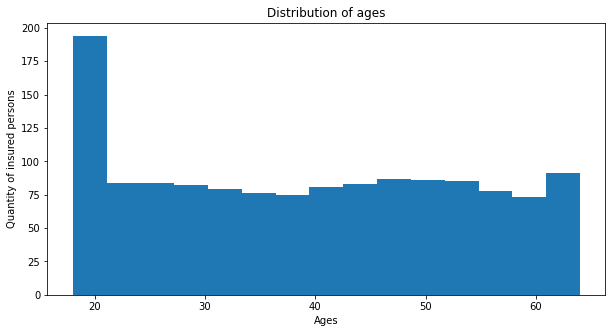

In [49]:
plt.hist(x = reg['age'], bins = 15)
plt.title('Distribution of ages')
plt.xlabel('Ages')
plt.ylabel('Quantity of insured persons')
plt.show()

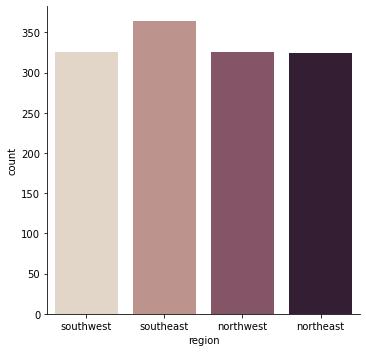

In [50]:
sns.catplot(x= 'region', kind="count", palette="ch:.25", data=df)

Text(0.5, 1.0, 'Cost for smoker/no smoker')

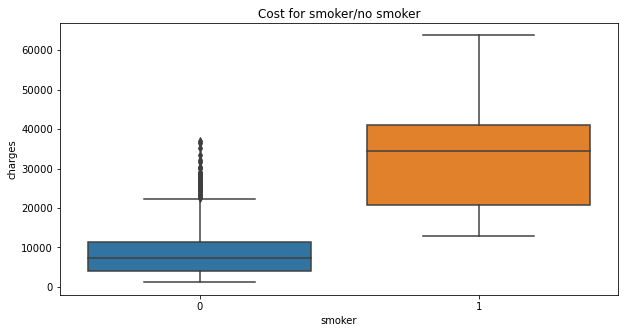

In [51]:
ax = sns.boxplot(x='smoker',y='charges', data = df)
plt.title('Cost for smoker/no smoker')

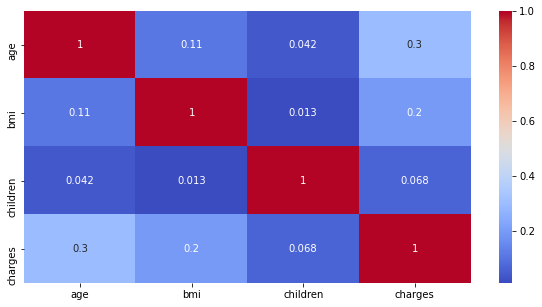

In [52]:
dfeda = pd.read_csv('insurance.csv')

plt.rcParams['figure.figsize'] = (10, 5)
sns.heatmap(dfeda.corr(), cmap = 'coolwarm', annot = True)

plt.show()

In [69]:
x = reg[['age','sex','children','smoker','southwest','southeast','northwest','northeast']]
y = reg[['charges']]


In [64]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [85]:
#def olsreg(df, x, y): 
#    Y =  y_train
    #X = x_train
   # model = sm.OLS(Y,X)
  #  res = model.fit()
 #   return(res)

#r = olsreg(reg.dropna(), x, y)
#r.summary()

from sklearn import linear_model

ols = linear_model.LinearRegression()
ols.fit(x_train,y_train)
ols_yhat = ols.predict(x_test)
print(ols.coef_)
print(ols.intercept_)

[[  274.37621712    49.20052275   496.71744843 23201.85752134
   -223.21178668   636.16650024  -524.08930319   111.13458963]]
[-2887.61768311]


In [98]:
from sklearn.model_selection import GridSearchCV

alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
model = linear_model.Lasso()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)
print(grid)

print(grid.best_score_)

print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.7004660111394801
1.0


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:458: UserWarning: With alpha=0, this algorithm does not converge well. You are advise

In [99]:
lasso = linear_model.Lasso(alpha=1.0)
lasso.fit(x_train,y_train)
lasso_yhat = lasso.predict(x_test)
print(lasso.coef_)
print(lasso.intercept_)

[  274.3670748     45.72835857   495.93088837 23196.7256453
  -212.47155144   639.9965354   -513.05684121   113.92592562]
[-2890.73308687]


In [100]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
model = linear_model.Ridge()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)
print(grid)

print(grid.best_score_)

print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.7006287966497601
0.0


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.752171e-19
  overwrite_a=True).T
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number8.390711e-20
  overwrite_a=True).T


In [101]:
ridge = linear_model.Ridge(alpha=0.0)
ridge.fit(x_train,y_train)
ridge_yhat = ridge.predict(x_test)
print(ridge.coef_)
print(ridge.intercept_)

[[ 2.74377078e+02  5.00163959e+01  4.97399294e+02  2.32013878e+04
  -2.24334089e+16 -2.24334089e+16 -2.24334089e+16 -2.24334089e+16]]
[2.24334089e+16]


In [102]:
alphas = np.array([1,0.1,0.01,0.001,0.0001,0])
model = linear_model.ElasticNet()
grid = GridSearchCV(estimator=model, param_grid=dict(alpha=alphas))
grid.fit(x_train, y_train)
print(grid)

print(grid.best_score_)

print(grid.best_estimator_.alpha)

GridSearchCV(cv=None, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 0.e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.7004507096029094
0.001


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase t

In [103]:
elastic = linear_model.ElasticNet(alpha=0.001)
elastic.fit(x_train,y_train)
elastic_yhat = elastic.predict(x_test)
print(elastic.coef_)
print(elastic.intercept_)

[  274.2501762     52.70414472   496.95329443 23129.3648147
  -226.14422681   638.75231925  -524.21642624   111.70915321]
[-2869.96811544]


C:\Users\Ivan\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [104]:
from sklearn.metrics import r2_score

print("Ordinary Least Square accuracy: %.2f" % r2_score(y_test, ols_yhat) )
print("Lasso regression accuracy: %.2f" % r2_score(y_test, lasso_yhat) )
print("Ridge regression accuracy: %.2f" % r2_score(y_test, ridge_yhat) )
print("Elastic net regression accuracy: %.2f" % r2_score(y_test, elastic_yhat) )

Ordinary Least Square accuracy: 0.77
Lasso regression accuracy: 0.77
Ridge regression accuracy: 0.77
Elastic net regression accuracy: 0.77
